# IMPORT LIB

In [1]:
import import_ipynb
from AE_LIB import *
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

importing Jupyter notebook from AE_LIB.ipynb


2023-09-30 11:19:24.531563: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-30 11:19:25.340912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 1) LOAD MODELS INFORMATION TABLE

In [2]:
all_model_info=pd.read_parquet("all_models_info_table.parquet")
all_model_info=pd.read_parquet("all_models_info_table_v2.parquet")

all_model_info

,cust,country,location,asset,subasset,device_type,ID,window_size,sample_time,rolling_window_time,bottleneck,wideneck,scaler_type,layers_type,column_num,loss_type,epoch_num,total_process_num,date_of_save,train_data_note,tools_path,model_name,scaler_name,is_live,author,read_path,shuffle,train_cols,time_column,train_start_time,model_input_shape_len,last_train_loss,dropout_rate,learning_rate,sample_time_func,rolling_window_func,reconstructed_column_template,error_column_template
0,nurol,tr,golbasi,fct2,pump-2,None,None,128,10S,None,16,128,StandardScaler,convolutional,4,mse,178,7,2023-09-09 19:58:14,LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21,s3://test-data-eng/anomaly_detection/autoencoder/tools/nurol/tr/golbasi/fct2/pump-2/nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_178_7_2023-09-09 19:58:14_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_178_7_2023-09-09 19:58:14_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_178_7_2023-09-09 19:58:14_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_scaler.gz,False,kia,s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/pump-2/{}/{}/{}/,False,gx-gy-gz-g_rms,tm,2023-09-09 10:23:05,3.0,0.546342,None,0.001,mean,mean,{}_ae_reconstructed,{}_ae_{}
1,nurol,tr,golbasi,fct2,pump-2,None,None,128,10S,None,16,128,StandardScaler,convolutional,4,mse,149,7,2023-09-09 19:10:05,LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21,s3://test-data-eng/anomaly_detection/autoencoder/tools/nurol/tr/golbasi/fct2/pump-2/nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_149_7_2023-09-09 19:10:05_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_149_7_2023-09-09 19:10:05_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_149_7_2023-09-09 19:10:05_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_scaler.gz,False,kia,s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/pump-2/{}/{}/{}/,False,mx-my-mz-m_rms,tm,2023-09-09 10:23:05,3.0,0.202045,None,0.001,mean,mean,{}_ae_reconstructed,{}_ae_{}
2,nurol,tr,golbasi,fct2,pump-2,None,None,128,10S,None,16,128,StandardScaler,convolutional,4,mse,148,7,2023-09-09 18:31:07,LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21,s3://test-data-eng/anomaly_detection/autoencoder/tools/nurol/tr/golbasi/fct2/pump-2/nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_148_7_2023-09-09 18:31:07_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_148_7_2023-09-09 18:31:07_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_148_7_2023-09-09 18:31:07_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_scaler.gz,False,kia,s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/pump-2/{}/{}/{}/,False,ax-ay-az-a_rms_eff,tm,2023-09-09 10:23:05,3.0,0.576230,None,0.001,mean,mean,{}_ae_reconstructed,{}_ae_{}
3,nurol,tr,golbasi,fct2,pump-1,None,None,128,10S,None,16,128,StandardScaler,convolutional,4,mse,78,7,2023-09-09 17:51:25,LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21,s3://test-data-eng/anomaly_detection/autoencoder/tools/nurol/tr/golbas

# 2) PLEASE SELECT THE MODELS WHOSE RESULTS YOU WANT TO PRINT FROM INFO TABLE.

##### 2.1)Select features as you want, make unselected what you didn't select

In [8]:
wanted_features_dictt={}
dictt={
    "cust":"nurol",
    "country":"unselected",
    "location":"unselected",
    "asset":"unselected",
    "subasset":"unselected",#"redressor-1-1",
    "device_type":"unselected",
    "ID":"unselected",
    "window_size":128,
    "sample_time":"unselected",#"1min",
    "rolling_window_time":"unselected",
    "bottleneck":"unselected",
    "wideneck":"unselected",
    "scaler_type":"StandardScaler",
    "layers_type":"unselected",
    "column_num":"unselected",
    "loss_type":"unselected",
    "epoch_num":"unselected",
    "total_process_num":"unselected",
    "date_of_save":"unselected",
    "train_data_note":"unselected",
    "tools_path":"unselected",
    "model_name":"unselected",
    "scaler_name":"unselected",
    "is_live":"unselected",
    "author":"unselected"
    }

print("Selected features:")
for a,b in dictt.items():
    if b!="unselected":
        print(a,b)
        wanted_features_dictt.update({a:b})
        
        
if  len(wanted_features_dictt)>0:
    mask=[(all_model_info[feature_key]==feature_value) for feature_key,feature_value in wanted_features_dictt.items()]
    model_info_with_wanted_features=all_model_info.loc[sum(mask)==len(wanted_features_dictt.items())]
model_info_with_wanted_features

Selected features:
cust nurol
window_size 128
scaler_type StandardScaler


,cust,country,location,asset,subasset,device_type,ID,window_size,sample_time,rolling_window_time,bottleneck,wideneck,scaler_type,layers_type,column_num,loss_type,epoch_num,total_process_num,date_of_save,train_data_note,tools_path,model_name,scaler_name,is_live,author,read_path,shuffle,train_cols,time_column,train_start_time,model_input_shape_len,last_train_loss,dropout_rate,learning_rate,sample_time_func,rolling_window_func,reconstructed_column_template,error_column_template
0,nurol,tr,golbasi,fct2,pump-2,None,None,128,10S,None,16,128,StandardScaler,convolutional,4,mse,178,7,2023-09-09 19:58:14,LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21,s3://test-data-eng/anomaly_detection/autoencoder/tools/nurol/tr/golbasi/fct2/pump-2/nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_178_7_2023-09-09 19:58:14_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_178_7_2023-09-09 19:58:14_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_178_7_2023-09-09 19:58:14_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_scaler.gz,False,kia,s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/pump-2/{}/{}/{}/,False,gx-gy-gz-g_rms,tm,2023-09-09 10:23:05,3.0,0.546342,None,0.001,mean,mean,{}_ae_reconstructed,{}_ae_{}
1,nurol,tr,golbasi,fct2,pump-2,None,None,128,10S,None,16,128,StandardScaler,convolutional,4,mse,149,7,2023-09-09 19:10:05,LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21,s3://test-data-eng/anomaly_detection/autoencoder/tools/nurol/tr/golbasi/fct2/pump-2/nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_149_7_2023-09-09 19:10:05_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_149_7_2023-09-09 19:10:05_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_149_7_2023-09-09 19:10:05_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_scaler.gz,False,kia,s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/pump-2/{}/{}/{}/,False,mx-my-mz-m_rms,tm,2023-09-09 10:23:05,3.0,0.202045,None,0.001,mean,mean,{}_ae_reconstructed,{}_ae_{}
2,nurol,tr,golbasi,fct2,pump-2,None,None,128,10S,None,16,128,StandardScaler,convolutional,4,mse,148,7,2023-09-09 18:31:07,LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21,s3://test-data-eng/anomaly_detection/autoencoder/tools/nurol/tr/golbasi/fct2/pump-2/nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_148_7_2023-09-09 18:31:07_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_148_7_2023-09-09 18:31:07_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_148_7_2023-09-09 18:31:07_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_scaler.gz,False,kia,s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/pump-2/{}/{}/{}/,False,ax-ay-az-a_rms_eff,tm,2023-09-09 10:23:05,3.0,0.576230,None,0.001,mean,mean,{}_ae_reconstructed,{}_ae_{}
3,nurol,tr,golbasi,fct2,pump-1,None,None,128,10S,None,16,128,StandardScaler,convolutional,4,mse,78,7,2023-09-09 17:51:25,LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21,s3://test-data-eng/anomaly_detection/autoencoder/tools/nurol/tr/golbas

##### 2.2) Then select models whose results you want to write

In [9]:
model_info_with_wanted_features=model_info_with_wanted_features.iloc[0:15]   # MUST BE A dataframe! so use :
model_info_with_wanted_features

,cust,country,location,asset,subasset,device_type,ID,window_size,sample_time,rolling_window_time,bottleneck,wideneck,scaler_type,layers_type,column_num,loss_type,epoch_num,total_process_num,date_of_save,train_data_note,tools_path,model_name,scaler_name,is_live,author,read_path,shuffle,train_cols,time_column,train_start_time,model_input_shape_len,last_train_loss,dropout_rate,learning_rate,sample_time_func,rolling_window_func,reconstructed_column_template,error_column_template
0,nurol,tr,golbasi,fct2,pump-2,None,None,128,10S,None,16,128,StandardScaler,convolutional,4,mse,178,7,2023-09-09 19:58:14,LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21,s3://test-data-eng/anomaly_detection/autoencoder/tools/nurol/tr/golbasi/fct2/pump-2/nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_178_7_2023-09-09 19:58:14_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_178_7_2023-09-09 19:58:14_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_178_7_2023-09-09 19:58:14_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_scaler.gz,False,kia,s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/pump-2/{}/{}/{}/,False,gx-gy-gz-g_rms,tm,2023-09-09 10:23:05,3.0,0.546342,None,0.001,mean,mean,{}_ae_reconstructed,{}_ae_{}
1,nurol,tr,golbasi,fct2,pump-2,None,None,128,10S,None,16,128,StandardScaler,convolutional,4,mse,149,7,2023-09-09 19:10:05,LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21,s3://test-data-eng/anomaly_detection/autoencoder/tools/nurol/tr/golbasi/fct2/pump-2/nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_149_7_2023-09-09 19:10:05_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_149_7_2023-09-09 19:10:05_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_149_7_2023-09-09 19:10:05_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_scaler.gz,False,kia,s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/pump-2/{}/{}/{}/,False,mx-my-mz-m_rms,tm,2023-09-09 10:23:05,3.0,0.202045,None,0.001,mean,mean,{}_ae_reconstructed,{}_ae_{}
2,nurol,tr,golbasi,fct2,pump-2,None,None,128,10S,None,16,128,StandardScaler,convolutional,4,mse,148,7,2023-09-09 18:31:07,LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21,s3://test-data-eng/anomaly_detection/autoencoder/tools/nurol/tr/golbasi/fct2/pump-2/nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_148_7_2023-09-09 18:31:07_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_148_7_2023-09-09 18:31:07_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5,nurol_tr_golbasi_fct2_pump-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_148_7_2023-09-09 18:31:07_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_scaler.gz,False,kia,s3://tm-partitioned/preprocessed/nurol/tr/golbasi/fct2/pump-2/{}/{}/{}/,False,ax-ay-az-a_rms_eff,tm,2023-09-09 10:23:05,3.0,0.576230,None,0.001,mean,mean,{}_ae_reconstructed,{}_ae_{}
3,nurol,tr,golbasi,fct2,pump-1,None,None,128,10S,None,16,128,StandardScaler,convolutional,4,mse,78,7,2023-09-09 17:51:25,LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21,s3://test-data-eng/anomaly_detection/autoencoder/tools/nurol/tr/golbas

# 3) CHOOSE PROCESS INTERVALS TO TEST 

### 3.1 NUROL

##### 3.1.1 NUROL FCT by_time_and_quality_extractor (option 1 )

In [9]:
test_data_info=pd.read_parquet("s3://test-data-eng/anomaly_detection/autoencoder/sources/preprocessed/nurol/tr/golbasi/fct2/train_data_info/train_data_info_nurol_fct2_by_time_and_quality_extractor.parquet") 

#test_data_info=test_data_info.iloc[253:]
test_data_info.loc[295,["start","end","cycle_num","year"]]=[pd.to_datetime('2023-02-21 02:23:06'),pd.to_datetime('2023-02-23 01:32:04'),10.0,2023]
test_data_info.loc[296,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-03-14 22:36:59"),pd.to_datetime("2023-03-16  23:22:19"),11.0,2023]
test_data_info.loc[297,["start","end","cycle_num","year"]]=[pd.to_datetime('2023-03-17 19:20:47'),pd.to_datetime('2023-03-19 17:43:27'),12.0,2023]
test_data_info.loc[298,["start","end","cycle_num","year"]]=[pd.to_datetime('2023-03-23 14:43:00'),pd.to_datetime('2023-03-25 14:31:52'),13.0,2023]
test_data_info.loc[299,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-05-06 01:21:54"),pd.to_datetime("2023-05-08 08:59:47"),14.0,2023]
test_data_info.loc[300,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-05-10 04:54:32"),pd.to_datetime("2023-05-12 15:32:16"),15.0,2023]
test_data_info.loc[301,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-05-17 16:31:05"),pd.to_datetime("2023-05-19 11:23:51"),16.0,2023]
test_data_info.loc[302,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-06-03 01:10:57"),pd.to_datetime("2023-06-05 01:02:45"),17.0,2023]
test_data_info.loc[303,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-06-16 15:23:42"),pd.to_datetime("2023-06-18 20:56:39"),18.0,2023]
test_data_info.loc[304,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-06-19 16:41:40"),pd.to_datetime("2023-06-21 18:43:58"),19.0,2023]
test_data_info.loc[305,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-07-02 16:58:52"),pd.to_datetime("2023-07-04 18:06:57"),20.0,2023]
test_data_info.loc[306,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-07-05 20:07:02"),pd.to_datetime("2023-07-07 20:12:07"),21.0,2023]
test_data_info.loc[307,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-07-08 14:48:29"),pd.to_datetime("2023-07-10 15:35:03"),22.0,2023]
test_data_info.loc[308,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-07-11 10:31:39"),pd.to_datetime("2023-07-13 12:26:19"),23.0,2023]
test_data_info.loc[309,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-07-13 17:10:42"),pd.to_datetime("2023-07-15 19:56:59"),24.0,2023]
test_data_info.loc[310,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-07-16 00:50:09"),pd.to_datetime("2023-07-18 08:06:39"),25.0,2023]
test_data_info.loc[311,["start","end","cycle_num","year"]]=[pd.to_datetime("2023-07-18 21:30:44"),pd.to_datetime("2023-07-20 23:28:06"),26.0,2023]



test_data_info["cycle_num"]=test_data_info["cycle_num"].astype(int)

test_data_info

,start,end,project,cycle_num,error_rate_total,error_rate_quality_gate_1,error_rate_quality_gate_2,year
0,2020-03-31 10:27:35,2020-04-02 08:45:07,None,1,NaN,NaN,NaN,2020.0
1,2020-04-11 09:47:42,2020-04-13 08:59:50,None,2,NaN,NaN,NaN,2020.0
2,2020-04-15 19:54:46,2020-04-17 09:11:31,None,3,NaN,NaN,NaN,2020.0
3,2020-04-17 20:27:36,2020-04-19 10:19:25,None,4,NaN,NaN,NaN,2020.0
4,2020-04-27 12:37:58,2020-04-29 01:20:37,None,5,NaN,NaN,NaN,2020.0
5,2020-05-08 12:01:13,2020-05-10 07:53:10,None,6,NaN,NaN,NaN,2020.0
6,2020-05-10 11:14:34,2020-05-12 05:41:55,None,7,NaN,NaN,NaN,2020.0
7,2020-05-12 20:16:17,2020-05-14 17:05:48,None,8,NaN,NaN,NaN,2020.0
8,2020-05-15 17:02:51,2020-05-17 11:07:57,None,9,NaN,NaN,NaN,2020.0
9,2020-05-21 14:03:00,2020-05-23 18:38:33,None,10,NaN,NaN,NaN,2020.0


In [40]:
test_data_info_addition=pd.read_parquet("s3://test-data-eng/anomaly_detection/autoencoder/sources/preprocessed/nurol/tr/golbasi/fct2/train_data_info/train_data_info_nurol_{}_by_gt_tech_step.parquet".format("fct2"))
test_data_info_addition=test_data_info_addition.loc[279:]
test_data_info_addition.loc[279:,"process_id"]=range(27,38)
test_data_info_addition["cycle_num"]=test_data_info_addition["process_id"]
test_data_info_addition["cycle_num"]=test_data_info_addition["cycle_num"].astype(int)
test_data_info=pd.concat([test_data_info,test_data_info_addition])
test_data_info.reset_index(inplace=True,drop=True)
test_data_info=test_data_info.loc[312:]

In [41]:
test_data_info

,start,end,project,cycle_num,error_rate_total,error_rate_quality_gate_1,error_rate_quality_gate_2,year,gtId,endPhase,process_id
312,2023-07-23 15:03:21,2023-07-24 04:57:30,NaN,27,NaN,NaN,NaN,2023.0,753.0,Heating,27.0
313,2023-07-26 15:43:59,2023-07-28 15:38:08,NaN,28,NaN,NaN,NaN,2023.0,754.0,Cooling,28.0
314,2023-07-28 15:39:49,2023-07-28 16:39:47,NaN,29,NaN,NaN,NaN,2023.0,755.0,Cooling,29.0
315,2023-07-29 20:51:26,2023-07-31 05:24:19,NaN,30,NaN,NaN,NaN,2023.0,756.0,Heating,30.0
316,2023-08-01 15:49:55,2023-08-03 18:05:16,NaN,31,NaN,NaN,NaN,2023.0,757.0,Cooling,31.0
317,2023-08-04 01:19:51,2023-08-06 00:34:01,NaN,32,NaN,NaN,NaN,2023.0,759.0,Cooling,32.0
318,2023-08-06 18:36:22,2023-08-08 19:08:14,NaN,33,NaN,NaN,NaN,2023.0,760.0,Cooling,33.0
319,2023-08-12 12:09:10,2023-08-14 13:39:39,NaN,34,NaN,NaN,NaN,2023.0,765.0,Cooling,34.0
320,2023-08-14 20:27:08,2023-08-16 19:54:02,NaN,35,NaN,NaN,NaN,2023.0,766.0,Cooling,35.0
321,2023-08-17 15:32:04,2023-08-19 20:48:25,NaN,36,NaN,NaN,NaN,2023.0,767.0,Cooling,36.0


##### 3.1.2 NUROL FCT by_gt_tech_step (option 2 )

In [11]:
test_data_info=pd.read_parquet("s3://test-data-eng/anomaly_detection/autoencoder/sources/preprocessed/nurol/tr/golbasi/fct2/train_data_info/train_data_info_nurol_{}_by_gt_tech_step.parquet".format("fct2"))
test_data_info["cycle_num"]=test_data_info["process_id"]
test_data_info["cycle_num"]=test_data_info["cycle_num"].astype(int)
test_data_info=test_data_info[225:]
test_data_info

,start,end,gtId,endPhase,process_id,year,cycle_num
225,2022-08-11 14:21:40,2022-08-13 17:29:28,660,Cooling,62,2022,62
226,2022-08-13 22:18:01,2022-08-15 22:09:00,661,Cooling,63,2022,63
227,2022-08-21 13:45:05,2022-08-23 12:19:11,664,Cooling,64,2022,64
228,2022-08-23 20:06:23,2022-08-25 20:26:23,665,Cooling,65,2022,65
229,2022-08-26 03:42:06,2022-08-27 12:03:15,666,Cooling,66,2022,66
230,2022-09-03 15:05:42,2022-09-05 17:13:31,671,Cooling,67,2022,67
231,2022-09-07 15:21:25,2022-09-09 07:20:53,672,Cooling,68,2022,68
232,2022-09-09 21:44:32,2022-09-11 23:57:08,673,Cooling,69,2022,69
233,2022-09-12 16:31:04,2022-09-14 16:24:49,674,Cooling,70,2022,70
234,2022-09-15 12:06:44,2022-09-17 15:12:21,675,Cooling,71,2022,71


# 4) CHOOSE TRAIN PARAMETERS

In [1]:
test_df_segment_num=1 # if data is big, increase
cust_features_column_names=["cust","country","location","asset","subasset"] # used to substitute device Id and type (do not touch for nurol)
write_path_prefix="s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/"
cust_list=["nurol","kutahya-ser","celik-halat"]

# 5) WRITE RESULTS

In [ ]:

read_paths=list(model_info_with_wanted_features["read_path"].unique())

for read_path in read_paths:
    print(read_path)
    cust_subasset_models_info,cust_path=find_cust_subassets_models_info(read_path,model_info_with_wanted_features,cust_features_column_names)
    for i in range(len(cust_subasset_models_info)):
        train_info_dict=get_train_info_dict(cust_subasset_models_info.iloc[i:i+1]) 
        train_info_dict.update({"test_df_segment_num":test_df_segment_num,"test_data_info":test_data_info})
        
        for j in range(len(train_info_dict["test_data_info"])):
            anomaly_dfs=[]
            
            test_df=read_spesific_files(train_info_dict["read_path"],start_end_df=train_info_dict["test_data_info"].iloc[j:j+1],use_cols=train_info_dict["use_cols"],time_column=train_info_dict["time_column"],cust_list=cust_list)
            
            if train_info_dict["rolling_window_time"]!=None:
                try:
                    test_df.index=test_df[time_column]
                    test_df.loc[:,train_cols]=test_df[train_cols].rolling(train_info_dict["rolling_window_time"]).mean()
                    test_df.reset_index(drop=True,inplace=True)
                except:
                    None
            test_df_segment_step=int(len(test_df)/test_df_segment_num)
            for df_segment_order in range(test_df_segment_num):
                test_df_segment=test_df.iloc[df_segment_order*test_df_segment_step:(df_segment_order+1)*test_df_segment_step]
                if len(test_df_segment)>0:
                    try:
                        X_test,X_test_list,sequence_df_list,divide_idx_list=get_data(test_df_segment,train_info_dict)
                        anomaly_df=get_monolithic_anomaly_df(X_list=X_test_list,sequence_df_list=sequence_df_list,train_info_dict=train_info_dict)
                        plt.show()
                        
                        anomaly_df["cycle_num"]=int(test_data_info["cycle_num"].iloc[j])
                        anomaly_df["year"]=test_data_info["year"].iloc[j]
                        anomaly_dfs.append(anomaly_df)
                    except Exception as e:
                        print(e)
                        
            if len(anomaly_dfs)>0:
                anomaly_df=pd.concat(anomaly_dfs)
                #write_path=write_path_prefix+cust_path+train_info_dict["model_name"]+"/"+str(int(train_info_dict["test_data_info"].iloc[j].year))+"/"+str(int(train_info_dict["test_data_info"].iloc[j].year))+"_"+str(train_info_dict["test_data_info"].iloc[j].cycle_num)+".parquet"
                write_path=write_path_prefix+cust_path+train_info_dict["model_name"]+"/"+str(int(train_info_dict["test_data_info"].iloc[j].year))+"/"+str(train_info_dict["test_data_info"].iloc[j].cycle_num)+".parquet"

                anomaly_df.to_parquet(write_path)
                print(write_path)

Successfully Read


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
568/568 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/62.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
534/534 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/63.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
519/519 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/64.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
536/536 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/65.parquet
average time diff between rows 0 days 00:00:10
divided points idxs
[]
  1/359 [..............................] - ETA: 5s

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


359/359 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/66.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
559/559 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/67.parquet
average time diff between rows 0 days 00:00:10
divided points idxs
[]
  1/446 [..............................] - ETA: 7s

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


446/446 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/68.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
560/560 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/69.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
535/535 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/70.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
571/571 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/71.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
545/545 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/72.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
538/538 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/73.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
515/515 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/74.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
559/559 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/75.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
554/554 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/76.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
556/556 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/77.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
571/571 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/78.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
547/547 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/79.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
566/566 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/80.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
546/546 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/81.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
560/560 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/82.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
540/540 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/83.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
573/573 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/84.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
541/541 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/85.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
522/522 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/86.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
543/543 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/87.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
510/510 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/88.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[12910]
103/103 [==============================] - 0s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/89.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
493/493 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/90.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
483/483 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2022/91.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
507/507 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/1.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
491/491 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/2.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
520/520 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/3.parquet
average time diff between rows 0 days 00:00:10
divided points idxs
[7425]
 26/229 [==>...........................] - ETA: 0s

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


44/44 [==============================] - 0s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/4.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
528/528 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/5.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
526/526 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/6.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
538/538 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/7.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
523/523 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/8.parquet
average time diff between rows 0 days 00:00:10
divided points idxs
[6504]
  1/200 [..............................] - ETA: 3s

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


303/303 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/10.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
531/531 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/11.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
620/620 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/12.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
613/613 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/13.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
475/475 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/14.parquet
average time diff between rows 0 days 00:00:10
divided points idxs
[3851, 10470, 12548]
 27/117 [=====>........................] - ETA: 0s

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


8/8 [==============================] - 0s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/15.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
596/596 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/16.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/17.parquet
average time diff between rows 0 days 00:00:10
divided points idxs
[]
53/84 [=================>............] - ETA: 0s

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


84/84 [==============================] - 0s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/23.parquet
average time diff between rows 0 days 00:00:10
divided points idxs
[5139]
  1/157 [..............................] - ETA: 2s

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


372/372 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/24.parquet
average time diff between rows 0 days 00:00:10
divided points idxs
[]
 52/153 [=========>....................] - ETA: 0s

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


153/153 [==============================] - 0s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/25.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
532/532 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/26.parquet
average time diff between rows 0 days 00:00:10
divided points idxs
[]
8/8 [==============================] - 0s 2ms/step


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/27.parquet
average time diff between rows 0 days 00:00:10
divided points idxs
[]
  1/361 [..............................] - ETA: 5s

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


361/361 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/28.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
560/560 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/29.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
527/527 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/30.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
539/539 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/31.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
551/551 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-3/nurol_tr_golbasi_fct2_redressor-1-3_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_127_7_2023-09-09 15:03:42_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/32.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
527/527 [==============================] - 1s 2ms/step


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
594/594 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-2/nurol_tr_golbasi_fct2_redressor-1-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_190_7_2023-09-09 14:31:09_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/28.parquet


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


average time diff between rows 0 days 00:00:10
divided points idxs
[]
557/557 [==============================] - 1s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-2/nurol_tr_golbasi_fct2_redressor-1-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_190_7_2023-09-09 14:31:09_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/29.parquet
203/203 [==============================] - 0s 2ms/step
s3://test-data-eng/anomaly_detection/autoencoder/outputs_teoman/nurol/tr/golbasi/fct2/redressor-1-2/nurol_tr_golbasi_fct2_redressor-1-2_128_10S_None_16_128_StandardScaler_convolutional_kia_4_mse_59_7_2023-09-09 13:39:37_LOBSTER_output_quality_prediction_trained_after_2_rezistance_change_2023-02-21_model.h5/2023/7.parquet


In [ ]:
# GERISI COP
# KUDRETLE CONVARIANCE DNEMELERI

In [49]:
cov_mtx=feature_df.cov()
cov_mtx

,m_rms_ae_mse,a_rms_eff_ae_mse,g_rms_ae_mse
m_rms_ae_mse,0.001502,0.000213,-6.305055e-06
a_rms_eff_ae_mse,0.000213,0.000082,-1.643509e-06
g_rms_ae_mse,-0.000006,-0.000002,2.588250e-07


In [52]:
reconstructed=anomaly_df[['m_rms_ae_reconstructed','a_rms_eff_ae_reconstructed','g_rms_ae_reconstructed']]
scaled=anomaly_df[['m_rms','a_rms_eff','g_rms']]


In [54]:
cov_mtx_scaled=scaled.cov()

In [64]:
cov_mtx=cov_mtx_scaled.values

In [67]:
error_list

[0.0003045117928800433,
 0.0003161060950747209,
 0.00032700041009067944,
 0.0005367037569414838,
 0.0004948173320389783,
 0.00024583158934995725,
 0.0017572999582447723,
 0.002664329387777507,
 0.0023289009083414486,
 0.000979122026125565,
 0.0003648086736913425,
 0.0013021289810494058,
 0.00457796578821245,
 0.005475271787832057,
 0.00534813913057243,
 0.0022446784766456227,
 0.0007029097866979063,
 0.0004070182112752304,
 0.0023152624279847906,
 0.0024503301011197846,
 0.0018591192646035472,
 0.0004419843508717855,
 0.0006189133674722682,
 0.0015143919578081732,
 0.004991105526522171,
 0.005805379888283146,
 0.004881104588603508,
 0.0015137758267154365,
 0.000726707559107104,
 0.0003676329706314792,
 0.0021637824178998076,
 0.002634256195488483,
 0.002324502956549603,
 0.0007376430853642534,
 0.0007772298617025292,
 0.001401944093498832,
 0.005029453623828155,
 0.0056864520610759245,
 0.004722287810848606,
 0.0011001456132559624,
 0.00021386561420730344,
 0.0007982839044652495,
 0.00

In [83]:
len(anomaly_df)

170824

In [84]:
error_list=[]
batch_size=1
step_size=1
total_numberOf_step=(len(scaled)-window_size)//step_size
for i in range(total_numberOf_step):
    start=i*step_size
    end=start+batch_size
    batch_scaled=scaled.iloc[start:end].values
    batch_reconstructed=reconstructed.iloc[start:end].values
    
    error=batch_scaled-batch_reconstructed
    error=error@cov_mtx@error.T
    
    error_list.append(error.ravel()[0])


In [79]:
len(scaled)

170824

In [80]:
len(reconstructed)

170824

In [78]:
print(total_numberOf_step)

170696


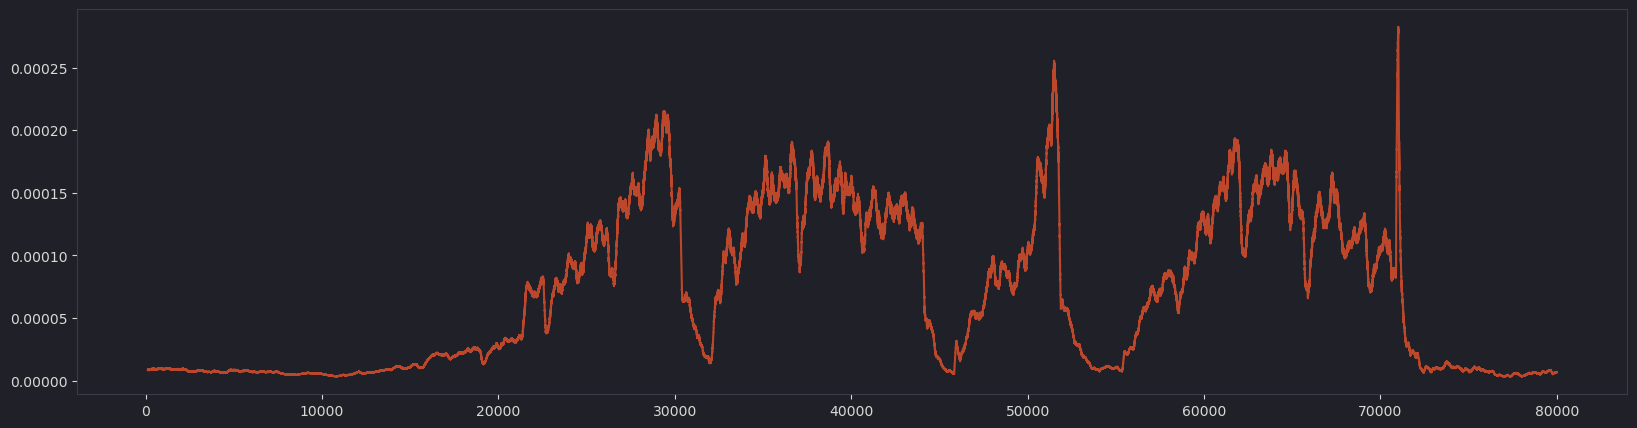

In [87]:
plt.plot((pd.Series(error_list)**2).rolling(128,step=1).mean().iloc[:80000])

<AxesSubplot: >

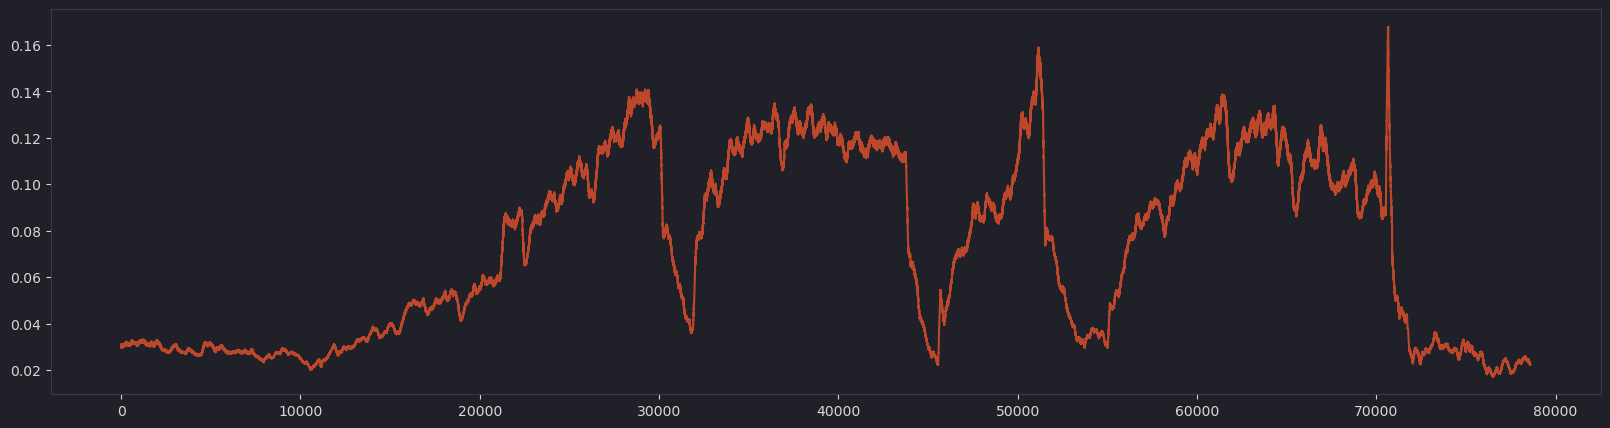

In [75]:
anomaly_df['m_rms_ae_mse'].plot()
#anomaly_df['a_rms_eff_ae_mse']
#anomaly_df['g_rms_ae_mse'].plot()

In [3]:
import pandas as pd
file_uri="s3://test-data-eng/anomaly_detection/autoencoder/outputs-concat/nurol/tr/golbasi/fct2/all/concat_trial_with_Kiarash/2020/1.parquet"
df=pd.read_parquet(file_uri)
df

,Cur. Time Charge,Resistance zone 1 - phase 1 [mOhm]_all,Resistance zone 1 - phase 2 [mOhm]_all,Resistance zone 1 - phase 3 [mOhm]_all,Resistance zone 2 - phase 1 [mOhm]_all,Resistance zone 2 - phase 2 [mOhm]_all,Resistance zone 2 - phase 3 [mOhm]_all,Resistance zone 1 - phase 1 [mOhm]_ae_mse_all,Resistance zone 1 - phase 2 [mOhm]_ae_mse_all,Resistance zone 1 - phase 3 [mOhm]_ae_mse_all,...,Current zone 1 - phase 2 [kA]_ae_reconstructed_mean,Current zone 1 - phase 2 [kA]_ae_reconstructed_variance,Current zone 1 - phase 3 [kA]_ae_reconstructed_mean,Current zone 1 - phase 3 [kA]_ae_reconstructed_variance,Current zone 2 - phase 1 [kA]_ae_reconstructed_mean,Current zone 2 - phase 1 [kA]_ae_reconstructed_variance,Current zone 2 - phase 2 [kA]_ae_reconstructed_mean,Current zone 2 - phase 2 [kA]_ae_reconstructed_variance,Current zone 2 - phase 3 [kA]_ae_reconstructed_mean,Current zone 2 - phase 3 [kA]_ae_reconstructed_variance
0,2020-03-31 11:36:00,-0.149148,-0.358734,-0.828253,-0.103914,-0.976536,-0.913704,0.004076,0.002881,0.013529,...,-1.072291,0.0,-1.076301,0.0,-1.016227,0.0,-1.015993,0.0,-1.019321,0.0
1,2020-03-31 11:37:00,-0.149148,-0.358734,-0.828253,-0.103914,-0.976536,-0.913704,0.004076,0.002881,0.013529,...,-1.072291,0.0,-1.076301,0.0,-1.016227,0.0,-1.015993,0.0,-1.019321,0.0
2,2020-03-31 11:38:00,-0.149148,-0.358734,-0.828253,-0.103914,-0.976536,-0.913704,0.004076,0.002881,0.013529,...,-1.072291,0.0,-1.076301,0.0,-1.016227,0.0,-1.015993,0.0,-1.019321,0.0
3,2020-03-31 11:39:00,-0.149148,-0.358734,-0.828253,-0.103914,-0.976536,-0.913704,0.004076,0.002881,0.013529,...,-1.072291,0.0,-1.076301,0.0,-1.016227,0.0,-1.015993,0.0,-1.019321,0.0
4,2020-03-31 11:40:00,-0.149148,-0.358734,-0.828253,-0.103914,-0.976536,-0.913704,0.004076,0.002881,0.013529,...,-1.072291,0.0,-1.076301,0.0,-1.016227,0.0,-1.015993,0.0,-1.019321,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,2020-04-02 06:52:00,-0.149148,-0.358734,-0.828253,-0.103914,-0.976536,-0.913704,NaN,NaN,NaN,...,-1.072291,0.0,-1.076301,0.0,-1.016227,0.0,-1.015993,0.0,-1.019321,0.0
2572,2020-04-02 06:53:00,-0.149148,-0.358734,-0.828253,-0.103914,-0.976536,-0.913704,NaN,NaN,NaN,...,-1.072291,0.0,-1.076301,0.0,-1.016227,0.0,-1.015993,0.0,-1.019321,0.0
2573,2020-04-02 06:54:00,-0.149148,-0.358734,-0.828253,-0.103914,-0.976536,-0.913704,NaN,NaN,NaN,...,-1.072291,0.0,-1.076301,0.0,-1.016227,0.0,-1.015993,0.0,-1.019321,0.0
2574,2020-04-02 06:55:00,-0.149148,-0.358734,-0.828253,-0.103914,-0.976536,-0.913704,NaN,NaN,NaN,...,-1.072291,0.0,-1.076301,0.0,-1.016227,0.0,-1.015993,0.0,-1.019321,0.0
